In [1]:
import pandas as pd
from pandas import DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import seaborn as sns

from scipy import stats
from scipy.stats import norm

# Calling all files needed

In [2]:
#Reading the four csv files 
data_train = pd.read_csv('data_train.csv')
installments_payments = pd.read_csv('installments_payments.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
previous_application = pd.read_csv('previous_application.csv')

# Cleaning data and Merging them together based on IDs

In [3]:
#Remove instances with at least one empty column 
data_train = data_train.dropna(axis=0)
installments_payments = installments_payments.dropna(axis=0)
credit_card_balance = credit_card_balance.dropna(axis=0)
previous_application = previous_application.dropna(axis=0)

In [4]:
#Merge data_train, credit_card_balance
Data_train_credit=pd.merge(data_train,credit_card_balance)

In [5]:
#Merge Data_train_credit with previous_application
data_train_app=pd.merge(Data_train_credit,previous_application, on='SK_ID_CURR')

In [6]:
#Merge data_train_app with installments_payments to create final data
data=pd.merge(data_train_app,installments_payments, on='SK_ID_CURR')

In [7]:
#Find shape of data
data.shape

(44370124, 43)

In [8]:
#Remove previous ID
del data['SK_ID_PREV']

In [9]:
#Keep one information per applicant
data = data.drop_duplicates(subset='SK_ID_CURR', keep="first")

In [10]:
#Find shape of data
data.shape

(9390, 42)

In [11]:
#Get a glamps of our data
data.head(2)

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,...,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CONTRACT_STATUS_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100100.0,0,202500,796396,38443,643500,0.008019,-15909,-1094,4,...,107766.0,117247.5,107766.0,Approved,0.0,114,-243.0,-243.0,483.345,483.345
12213,100145.0,0,202500,260725,16789,198000,0.018850,-16282,-4375,2,...,427500.0,522301.5,427500.0,Approved,1.0,22,-169.0,-169.0,29412.810,29412.810


In [12]:
#Change the index of dataset and make it start from 0 to the end
data.index = range(9390)

In [13]:
#Negetive number doesnt have meaning in our dataset(like days of birth and employment) so make all negetive to positive
data = data.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

In [14]:
#Check the distribution of TARGET columns
data['TARGET'].value_counts()

0    8458
1     932
Name: TARGET, dtype: int64

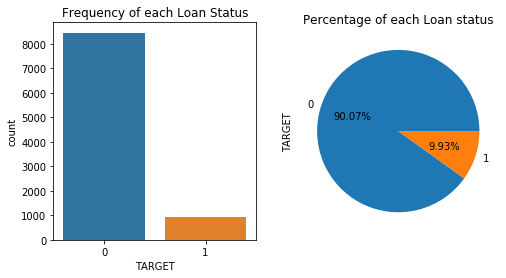

In [15]:
#Draw the ratio of each class to whole data
fig, axs = plt.subplots(1,2,figsize=(8,4))
sns.countplot(x='TARGET',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
data.TARGET.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

# One-Hot Encoding

In [16]:
#Examine classes of all columns
data.dtypes.value_counts()

float64    22
int64      13
object      7
dtype: int64

In [17]:
#Number of unique classes in each object columns
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                2
FLAG_OWN_REALTY            2
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
OCCUPATION_TYPE           18
NAME_CONTRACT_STATUS_x     3
NAME_CONTRACT_STATUS_y     4
dtype: int64

In [18]:
#one-hot encoding of categorical variables(make all object columns to numeric)
data = pd.get_dummies(data)
print('Training Features shape: ', data.shape)


Training Features shape:  (9390, 74)


In [19]:
#Examine dtypes of data
data.dtypes.value_counts()

uint8      39
float64    22
int64      13
dtype: int64

In [20]:
data.head(2)

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_x_Active,NAME_CONTRACT_STATUS_x_Completed,NAME_CONTRACT_STATUS_x_Signed,NAME_CONTRACT_STATUS_y_Approved,NAME_CONTRACT_STATUS_y_Canceled,NAME_CONTRACT_STATUS_y_Refused,NAME_CONTRACT_STATUS_y_Unused offer
0,100100.0,0,202500,796396,38443,643500,0.008019,15909,1094,4,...,0,0,0,1,0,0,1,0,0,0
1,100145.0,0,202500,260725,16789,198000,0.018850,16282,4375,2,...,0,0,0,1,0,0,1,0,0,0


# Dealing with outliear in dataset

In [21]:
data['SK_ID_CURR'] = data['SK_ID_CURR'].astype(str)

In [22]:
#Eximine the destribution of features
data.describe()

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_x_Active,NAME_CONTRACT_STATUS_x_Completed,NAME_CONTRACT_STATUS_x_Signed,NAME_CONTRACT_STATUS_y_Approved,NAME_CONTRACT_STATUS_y_Canceled,NAME_CONTRACT_STATUS_y_Refused,NAME_CONTRACT_STATUS_y_Unused offer
count,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,...,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000,9390.000000
mean,0.099255,190067.360490,518271.796699,26570.763259,459529.401810,0.021481,14825.168158,2327.657827,2.408307,2.021299,...,0.004899,0.039617,0.002236,0.965921,0.032801,0.001278,0.814058,0.007561,0.176890,0.001491
std,0.299019,79802.268332,238846.229011,11720.167702,219023.557797,0.013534,3278.717496,2090.533296,0.932859,0.484034,...,0.069824,0.195067,0.047240,0.181441,0.178124,0.035728,0.389081,0.086631,0.381596,0.038586
min,0.000000,31500.000000,45000.000000,2205.000000,45000.000000,0.001276,7820.000000,26.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,135000.000000,307991.250000,18684.000000,256500.000000,0.010276,12185.500000,840.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,180000.000000,512338.000000,25375.000000,450000.000000,0.019101,14568.000000,1714.500000,2.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,225000.000000,704844.000000,32067.000000,675000.000000,0.028663,17260.750000,3160.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,495000.000000,999121.000000,99004.000000,999000.000000,0.072508,23599.000000,14436.000000,8.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#columns that need to be chase for outliears
Outliear_detection=data[[
    'AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','DAYS_EMPLOYED','DAYS_BIRTH'
                        , 'AMT_BALANCE','AMT_CREDIT_LIMIT_ACTUAL', 'AMT_TOTAL_RECEIVABLE','AMT_PAYMENT_TOTAL_CURRENT'
                        ]]

In [24]:
#Using zscore to deal with outliears
from scipy import stats
data=data[(np.abs(stats.zscore(Outliear_detection)) <= 3).all(axis=1)]

In [25]:
#Check how many rows exist after deleting outliears
data.shape

(8486, 74)

In [26]:
#Making target value as a seperate dataframe
data_target=data[['TARGET']]

In [27]:
#Number of approved(0) and rejected(1) applicants
data_target['TARGET'].value_counts()

0    7636
1     850
Name: TARGET, dtype: int64

In [28]:
data.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_x_Active,NAME_CONTRACT_STATUS_x_Completed,NAME_CONTRACT_STATUS_x_Signed,NAME_CONTRACT_STATUS_y_Approved,NAME_CONTRACT_STATUS_y_Canceled,NAME_CONTRACT_STATUS_y_Refused,NAME_CONTRACT_STATUS_y_Unused offer
0,100100.0,0,202500,796396,38443,643500,0.008019,15909,1094,4,...,0,0,0,1,0,0,1,0,0,0
1,100145.0,0,202500,260725,16789,198000,0.018850,16282,4375,2,...,0,0,0,1,0,0,1,0,0,0
2,100198.0,0,135000,531000,32616,531000,0.028663,13116,1786,3,...,0,0,0,0,1,0,0,0,1,0
4,100284.0,0,180000,675000,29862,675000,0.015221,14445,3218,4,...,0,0,0,1,0,0,1,0,0,0
5,100378.0,0,247500,808650,26217,675000,0.008575,15017,639,2,...,0,0,0,1,0,0,1,0,0,0


# Chose sample size for analyse and model

In [29]:
#Select 850 rows from rejected application(these are all rejected applications)
df_ONE = data.sample(n=850,  weights=data['TARGET']==1,random_state=5)

In [30]:
df_ONE['TARGET'].value_counts()

1    850
Name: TARGET, dtype: int64

In [31]:
#Select 1000 rows from approved application
df_ALL = data.sample(n=1000, weights=data['TARGET']==0,random_state=5)

In [32]:
#Concatinate the two datasets together
data=pd.concat([df_ONE,df_ALL])

In [33]:
#Check the shape
data.shape

(1850, 74)

In [34]:
#Examine if selection is correct
data['TARGET'].value_counts()

0    1000
1     850
Name: TARGET, dtype: int64

In [35]:
data.dtypes.value_counts()

uint8      39
float64    21
int64      13
object      1
dtype: int64

In [36]:
#Change the index of dataset and make it start from 0 to the end
data.index = range(1850)

# Features Importants

In [37]:
#Remove applicant IDs as their index represent it
del data['SK_ID_CURR']

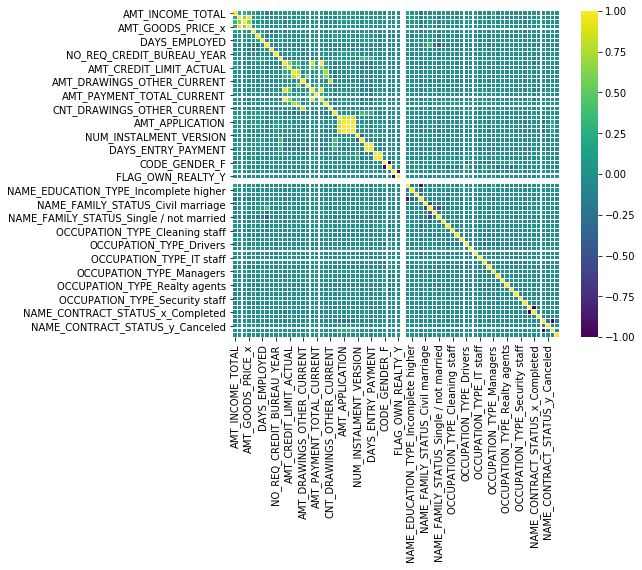

In [38]:
#Correlation between columns
corr = data.drop('TARGET', axis=1).corr() 
plt.figure(figsize=(8, 6))
sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=False, annot_kws={"size": 8}, square=True)

In [39]:
#Find correlations with the target and sort
correlations = data.corr()['TARGET'].sort_values()
correlations

DAYS_EMPLOYED                                       -0.130296
CODE_GENDER_F                                       -0.117965
NAME_EDUCATION_TYPE_Higher education                -0.092880
OCCUPATION_TYPE_Accountants                         -0.091165
MONTHS_BALANCE                                      -0.081008
                                                       ...   
NAME_EDUCATION_TYPE_Secondary / secondary special    0.094015
REGION_RATING_CLIENT_W_CITY                          0.109135
CODE_GENDER_M                                        0.117965
TARGET                                               1.000000
NAME_EDUCATION_TYPE_Academic degree                       NaN
Name: TARGET, Length: 73, dtype: float64

In [40]:
#There is Nan in correlation means all value are zero 
del data['NAME_EDUCATION_TYPE_Academic degree']

In [41]:
data.head(2)

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,NAME_CONTRACT_STATUS_x_Active,NAME_CONTRACT_STATUS_x_Completed,NAME_CONTRACT_STATUS_x_Signed,NAME_CONTRACT_STATUS_y_Approved,NAME_CONTRACT_STATUS_y_Canceled,NAME_CONTRACT_STATUS_y_Refused,NAME_CONTRACT_STATUS_y_Unused offer
0,1,157500,634482,24714,454500,0.024610,10081,889,2,2,...,0,0,0,1,0,0,1,0,0,0
1,1,108000,306306,16744,247500,0.031329,11439,1598,2,2,...,0,0,0,1,0,0,1,0,0,0


[6.61214312e-03 6.64844152e-03 6.24271785e-03 1.28654220e-02
 9.15882026e-03 1.72609706e-02 8.42369160e-03 6.35279768e-03
 3.72023714e-03 3.87961591e-03 1.34551201e-02 9.60449300e-03
 6.01515753e-03 8.92261964e-03 1.89540650e-02 0.00000000e+00
 2.67263841e-02 1.00437038e-02 8.07914621e-03 8.01614336e-03
 9.17426715e-03 0.00000000e+00 5.68649359e-03 7.71024110e-03
 9.43094289e-03 1.34045497e-02 8.19694928e-03 4.05352060e-03
 9.66254933e-03 3.61906298e-03 8.91992815e-03 4.50245169e-03
 1.21121673e-02 8.65102451e-03 3.39930478e-03 2.85088592e-03
 2.24763256e-03 8.09907786e-03 1.17343223e-02 0.00000000e+00
 5.30839048e-03 6.83961244e-03 6.53105963e-03 1.42160921e-04
 1.42536778e-02 1.19305577e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.69844838e-03 2.41414827e-02 1.25270856e-03
 0.00000000e+00 0.00000000e+00 2.73072458e-03 0.00000000e+00
 1.83541448e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.70537942e-04 0.00000000e+00 3.15953890e-06 0.00000000e+00
 8.49754822e-08 1.188285

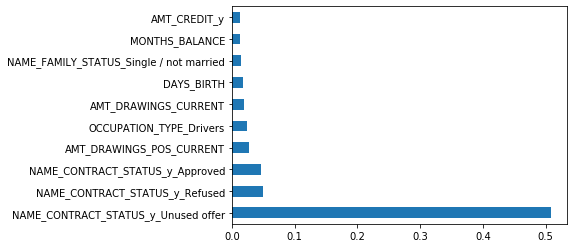

In [42]:
#Try to select best features (related to the target)
X = data.iloc[:,1:73] 
#target column
y = data.iloc[:,-1] 

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [43]:
#Try to select best features (related to target)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 40 best features
bestfeatures = SelectKBest(score_func=chi2, k=40)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 
#print 40 best features
L=featureScores.nlargest(40,'Score')
print(L) 

                                      Specs          Score
25                             AMT_CREDIT_y  703421.668210
24                          AMT_APPLICATION  622600.141356
26                        AMT_GOODS_PRICE_y  622600.141356
14                     AMT_DRAWINGS_CURRENT  217107.234647
3                         AMT_GOODS_PRICE_x  157262.828851
1                              AMT_CREDIT_x  132284.431433
16                 AMT_DRAWINGS_POS_CURRENT  115000.591219
13                 AMT_DRAWINGS_ATM_CURRENT  110664.494544
12                  AMT_CREDIT_LIMIT_ACTUAL   32038.251625
23                            AMT_ANNUITY_y   23423.919037
31                           AMT_INSTALMENT   14359.376070
32                              AMT_PAYMENT   13271.602866
18                AMT_PAYMENT_TOTAL_CURRENT   10049.714421
11                              AMT_BALANCE   10039.615556
19                     AMT_TOTAL_RECEIVABLE    8238.290187
0                          AMT_INCOME_TOTAL    2840.7737

In [44]:
L['Specs']

25                               AMT_CREDIT_y
24                            AMT_APPLICATION
26                          AMT_GOODS_PRICE_y
14                       AMT_DRAWINGS_CURRENT
3                           AMT_GOODS_PRICE_x
1                                AMT_CREDIT_x
16                   AMT_DRAWINGS_POS_CURRENT
13                   AMT_DRAWINGS_ATM_CURRENT
12                    AMT_CREDIT_LIMIT_ACTUAL
23                              AMT_ANNUITY_y
31                             AMT_INSTALMENT
32                                AMT_PAYMENT
18                  AMT_PAYMENT_TOTAL_CURRENT
11                                AMT_BALANCE
19                       AMT_TOTAL_RECEIVABLE
0                            AMT_INCOME_TOTAL
70        NAME_CONTRACT_STATUS_y_Unused offer
5                                  DAYS_BIRTH
2                               AMT_ANNUITY_x
15                 AMT_DRAWINGS_OTHER_CURRENT
17                    AMT_INST_MIN_REGULARITY
6                               DA

In [45]:
#Select the 40 highest correlated columns to TARGET
data=data[['TARGET', 'AMT_CREDIT_y', 'AMT_APPLICATION', 'AMT_GOODS_PRICE_y','AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 
               'AMT_DRAWINGS_ATM_CURRENT', 'AMT_GOODS_PRICE_x', 'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_INSTALMENT', 
               'AMT_PAYMENT', 'AMT_PAYMENT_TOTAL_CURRENT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY_y', 
               'AMT_TOTAL_RECEIVABLE', 'AMT_CREDIT_x', 'AMT_BALANCE', 'AMT_INST_MIN_REGULARITY', 
               'AMT_ANNUITY_x', 'NAME_CONTRACT_STATUS_y_Unused offer', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
               'AMT_DRAWINGS_OTHER_CURRENT', 'DAYS_ENTRY_PAYMENT', 'DAYS_INSTALMENT', 'NUM_INSTALMENT_NUMBER', 
               'MONTHS_BALANCE', 'CNT_INSTALMENT_MATURE_CUM', 'OCCUPATION_TYPE_Accountants', 'NAME_CONTRACT_STATUS_y_Approved', 
               'NAME_EDUCATION_TYPE_Incomplete higher', 'CODE_GENDER_F', 'CNT_DRAWINGS_ATM_CURRENT', 'NO_REQ_CREDIT_BUREAU_YEAR',
               'CODE_GENDER_M', 'OCCUPATION_TYPE_Laborers', 'FLAG_OWN_REALTY_N', 'OCCUPATION_TYPE_Drivers', 
               'NAME_CONTRACT_STATUS_y_Refused', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Secondary / secondary special'
              ]]

In [46]:
#Examine the shape of dataset
data.shape

(1850, 41)

In [47]:
#Select features that unique value is more than just one value
data = data.loc[:,data.apply(pd.Series.nunique) != 1]

In [48]:
#Print columns that for each unique value have less than 50 rows
for col in data.columns:
    if (len(data[col].unique()) <= 50):
        print(data[col].value_counts())
print()

0    1000
1     850
Name: TARGET, dtype: int64
0    1846
1       4
Name: NAME_CONTRACT_STATUS_y_Unused offer, dtype: int64
0.0         1847
266220.0       1
45000.0        1
96390.0        1
Name: AMT_DRAWINGS_OTHER_CURRENT, dtype: int64
0    1798
1      52
Name: OCCUPATION_TYPE_Accountants, dtype: int64
1    1450
0     400
Name: NAME_CONTRACT_STATUS_y_Approved, dtype: int64
0    1795
1      55
Name: NAME_EDUCATION_TYPE_Incomplete higher, dtype: int64
0    1134
1     716
Name: CODE_GENDER_F, dtype: int64
0.0     1499
1.0      181
2.0       69
3.0       37
4.0       20
5.0       14
6.0        8
7.0        5
10.0       5
12.0       3
8.0        2
18.0       1
19.0       1
15.0       1
16.0       1
13.0       1
26.0       1
9.0        1
Name: CNT_DRAWINGS_ATM_CURRENT, dtype: int64
3     392
2     355
4     280
1     217
5     192
6     133
0      99
7      75
8      46
9      21
10     13
11     13
13      4
12      3
21      1
14      1
15      1
16      1
17      1
19      1
23      1
N

In [49]:
#Drop the feature with less than 50 rows for one value
print(data.shape[1])
data= data.drop('NAME_CONTRACT_STATUS_y_Unused offer', axis=1)
print("We've been able to reduce the features to => {}".format(data.shape[1]))

41
We've been able to reduce the features to => 40


In [50]:
#Drop the feature with less than 50 rows for one value
print(data.shape[1])
data= data.drop('AMT_DRAWINGS_OTHER_CURRENT', axis=1)
print("We've been able to reduce the features to => {}".format(data.shape[1]))

40
We've been able to reduce the features to => 39


In [51]:
#Lets seperate target column
data_target=data[['TARGET']]

In [52]:
#Drop the TARGET column
data_numeric=data.drop(columns=['TARGET'])

# Normalize final data and call it data_numeric_norm

In [53]:
#Apply MinMaxScaler to have a uniform dataset
from sklearn import preprocessing

data_numeric_float=data_numeric.values.astype(float)
#Create a min max processor object
min_max_scaler = preprocessing.MinMaxScaler()

#Create an object to transform the data to fit minmax processor
data_numeric_float_transformed = min_max_scaler.fit_transform(data_numeric_float)

#Save the transformed data into a DataFrame
data_numeric_norm= pd.DataFrame(data_numeric_float_transformed)


# Extract data and its normalized with the target

In [54]:
#Save data_numeric_norm as a csv file
data_numeric_norm.to_csv (r'C:\Users\User\Desktop\A_Thesis\Dataset\Dataset_CSV\data_numeric_norm.csv', index = False, header=True)

In [55]:
data.to_csv (r'C:\Users\User\Desktop\A_Thesis\Dataset\Dataset_CSV\data.csv', index = False, header=True)

In [56]:
#Save data_target as a csv file
data_target.to_csv (r'C:\Users\User\Desktop\A_Thesis\Dataset\Dataset_CSV\data_target.csv', index = False, header=True)

# Exploratory Data Analysis

[Text(0.5, 0, 'TARGET'),
 Text(2.5, 0, 'AMT_APPLICATION'),
 Text(4.5, 0, 'AMT_DRAWINGS_CURRENT'),
 Text(6.5, 0, 'AMT_DRAWINGS_ATM_CURRENT'),
 Text(8.5, 0, 'AMT_CREDIT_LIMIT_ACTUAL'),
 Text(10.5, 0, 'AMT_PAYMENT'),
 Text(12.5, 0, 'AMT_INCOME_TOTAL'),
 Text(14.5, 0, 'AMT_TOTAL_RECEIVABLE'),
 Text(16.5, 0, 'AMT_BALANCE'),
 Text(18.5, 0, 'AMT_ANNUITY_x'),
 Text(20.5, 0, 'DAYS_EMPLOYED'),
 Text(22.5, 0, 'DAYS_INSTALMENT'),
 Text(24.5, 0, 'MONTHS_BALANCE'),
 Text(26.5, 0, 'OCCUPATION_TYPE_Accountants'),
 Text(28.5, 0, 'NAME_EDUCATION_TYPE_Incomplete higher'),
 Text(30.5, 0, 'CNT_DRAWINGS_ATM_CURRENT'),
 Text(32.5, 0, 'CODE_GENDER_M'),
 Text(34.5, 0, 'FLAG_OWN_REALTY_N'),
 Text(36.5, 0, 'NAME_CONTRACT_STATUS_y_Refused'),
 Text(38.5, 0, 'NAME_EDUCATION_TYPE_Secondary / secondary special')]

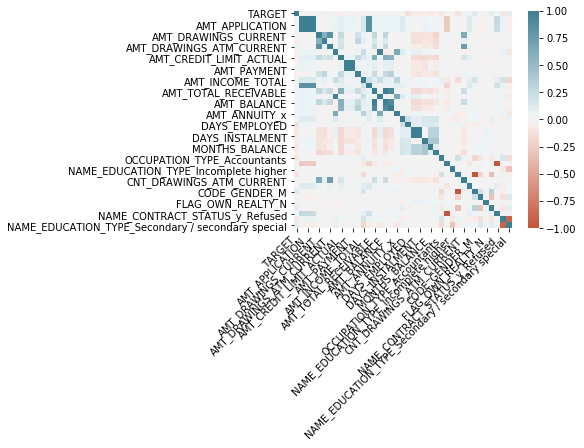

In [57]:
#Correlation between features
corr = data.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=250),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

In [58]:
data.head(3)

,TARGET,AMT_CREDIT_y,AMT_APPLICATION,AMT_GOODS_PRICE_y,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_DRAWINGS_ATM_CURRENT,AMT_GOODS_PRICE_x,AMT_CREDIT_LIMIT_ACTUAL,AMT_INSTALMENT,...,CODE_GENDER_F,CNT_DRAWINGS_ATM_CURRENT,NO_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_M,OCCUPATION_TYPE_Laborers,FLAG_OWN_REALTY_N,OCCUPATION_TYPE_Drivers,NAME_CONTRACT_STATUS_y_Refused,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special
0,1,160173.0,160173.0,160173.0,1546.20,1546.20,0.0,454500,225000,14934.60,...,0,0.0,10,1,1,0,0,0,0,1
1,1,94405.5,101695.5,101695.5,517.50,517.50,0.0,247500,180000,13479.21,...,1,0.0,3,0,0,0,0,0,0,1
2,1,45000.0,45000.0,45000.0,27880.65,27880.65,0.0,711000,45000,27760.86,...,0,0.0,4,1,1,0,0,0,0,1


In [59]:
#Find correlations with the target and sort
correlations = data.corr()['TARGET'].sort_values()
print(correlations.head(5), correlations.tail(6))

DAYS_EMPLOYED                          -0.130296
CODE_GENDER_F                          -0.117965
NAME_EDUCATION_TYPE_Higher education   -0.092880
OCCUPATION_TYPE_Accountants            -0.091165
MONTHS_BALANCE                         -0.081008
Name: TARGET, dtype: float64 CNT_DRAWINGS_ATM_CURRENT                             0.052404
AMT_DRAWINGS_ATM_CURRENT                             0.064556
OCCUPATION_TYPE_Drivers                              0.083690
NAME_EDUCATION_TYPE_Secondary / secondary special    0.094015
CODE_GENDER_M                                        0.117965
TARGET                                               1.000000
Name: TARGET, dtype: float64


In [62]:
#Make the top ten feature as seperate table
Top_ten=pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10], columns = ['Top_corr_features','Top_corr_scores'] )

In [63]:
#Define columns of that table
Top_ten['Top_corr_features']=['DAYS_EMPLOYED', 'CODE_GENDER_F','EDUCATION_TYPE_Higher education','OCCUPATION_TYPE_Accountants',
                  'MONTHS_BALANCE', 'CODE_GENDER_M','EDUCATION_TYPE_Secondary','OCCUPATION_TYPE_Drivers',
                  'AMT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_ATM_CURRENT']
Top_ten['Top_corr_scores']=[-0.130296,-0.117965,-0.092880, -0.091165, -0.081008,0.117965,0.094015,0.083690,0.064556,0.052404]

In [64]:
Top_ten

,Top_corr_features,Top_corr_scores
1,DAYS_EMPLOYED,-0.130296
2,CODE_GENDER_F,-0.117965
3,EDUCATION_TYPE_Higher education,-0.092880
4,OCCUPATION_TYPE_Accountants,-0.091165
5,MONTHS_BALANCE,-0.081008
6,CODE_GENDER_M,0.117965
7,EDUCATION_TYPE_Secondary,0.094015
8,OCCUPATION_TYPE_Drivers,0.083690
9,AMT_DRAWINGS_ATM_CURRENT,0.064556
10,CNT_DRAWINGS_ATM_CURRENT,0.052404


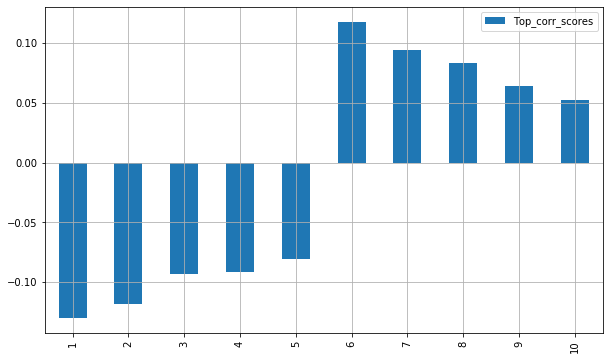

In [65]:
#Create the bar  chart of the ten top correlated features
Top_ten.plot(kind='bar', stacked=False, grid=True, figsize=(10,6))

In [66]:
#Save Top_ten as a csv file
Top_ten.to_csv (r'C:\Users\User\Desktop\A_Thesis\Dataset\Dataset_CSV\Top_ten.csv', index = False, header=True)

In [67]:
#Describtion of DAYS_BIRTH
(data['DAYS_BIRTH'] / 365).describe()

count    1850.000000
mean       40.050762
std         8.878242
min        21.731507
25%        32.750685
50%        39.010959
75%        46.617808
max        64.654795
Name: DAYS_BIRTH, dtype: float64

In [68]:
#Describtion of DAYS_EMPLOYED
(data['DAYS_EMPLOYED'] / 365).describe()

count    1850.000000
mean        5.465521
std         4.511542
min         0.194521
25%         2.023288
50%         4.182192
75%         7.706849
max        23.402740
Name: DAYS_EMPLOYED, dtype: float64

In [69]:
# Age and target in seperate table to compare
data_group = data[['TARGET', 'DAYS_BIRTH','DAYS_EMPLOYED','CODE_GENDER_M', 'AMT_APPLICATION','OCCUPATION_TYPE_Accountants']]
data_group['YEARS_BIRTH'] = data_group['DAYS_BIRTH'] / 365
data_group['YEARS_EMPLOYED'] = data_group['DAYS_EMPLOYED'] / 365

C:\Anaconda3\envs\leila-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\leila-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


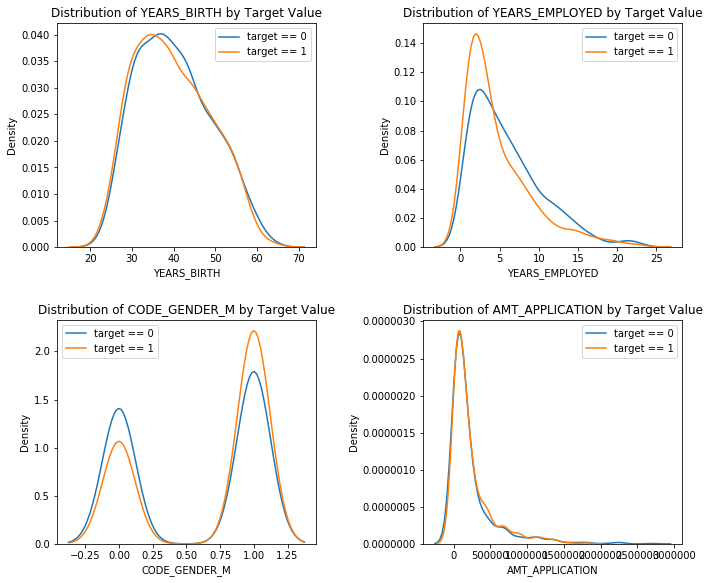

In [70]:
#Draw density distribution of 4 features
plt.figure(figsize = (10, 16))
#iterate through the new features
for i, feature in enumerate(['YEARS_BIRTH','YEARS_EMPLOYED','CODE_GENDER_M', 'AMT_APPLICATION']):
    
    #create a new subplot for each source
    plt.subplot(4, 2, i + 1)
    #plot repaid loans
    sns.kdeplot(data_group.loc[data_group['TARGET'] == 0, feature], label = 'target == 0')
    #plot loans that were not repaid
    sns.kdeplot(data_group.loc[data_group['TARGET'] == 1, feature], label = 'target == 1')
    
    #Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)